In [2]:
import os
import numpy as np
import pandas as pd
import altair as alt
import qgrid

In [3]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

# Catalist Margin Data

Revisiting What Happened in the 2018 Election. Yair Ghitza. [https://medium.com/@yghitza_48326/revisiting-what-happened-in-the-2018-election-c532feb51c0#_ftn1](https://medium.com/@yghitza_48326/revisiting-what-happened-in-the-2018-election-c532feb51c0#_ftn1), Source: [https://docs.google.com/spreadsheets/d/1UwC_GapbE3vF6-n1THVbwcXoU_zFvO8jJQL99ouX3Rw/edit?ts=5beae6d4#gid=433702266](https://docs.google.com/spreadsheets/d/1UwC_GapbE3vF6-n1THVbwcXoU_zFvO8jJQL99ouX3Rw/edit?ts=5beae6d4#gid=433702266)

In [4]:
old_cols = ['category', 'group', 'year', 'num', 'dem_margin', 'turnout']
new_cols = ['category', 'group', 'year', 'pct_elect', 'dem_margin', 'turnout']


margin_path = os.path.join(os.getcwd(), 'data', 'catalist-ep', 'margin_raw.csv')
margin_df = pd.read_csv(margin_path)
margin_df

# Note, to get age groups to match up, you just need to use
# There's no basis for changing the margin, so just change the pct_elect values.
# And you only need the pct_elect from one dataset, so it doesn't need to be changed in both.

,2018,2016,2014,2012,2010,2008,measure,group,category
0,75,74,79,76,79,77,pct_elect,White,race
1,12,12,11,13,11,12,pct_elect,Black,race
2,8,9,6,7,6,7,pct_elect,Hispanic/Latino,race
3,5,5,4,5,4,4,pct_elect,Asian/Other,race
4,11,14,8,14,9,16,pct_elect,18-29,age
5,21,22,18,23,20,24,pct_elect,30-44,age
6,39,39,43,40,45,40,pct_elect,45-64,age
7,29,25,31,23,26,20,pct_elect,65+,age
8,65,66,66,67,68,69,pct_elect,Non-College,education
9,35,34,34,33,32,31,pct_elect,College,education


In [5]:
# Just use the pct_elect from the Elections Project data, because this corresponds with
# the age groups correctly, then you don't need to adjust any actual numbers.
# There's no real basis to infer how dem_margin will change based on 45-64 vs 45-59. . .
def alter_group(el):
    if el == '45-64':
        return '45-59'
    elif el == '65+':
        return '60+'
    elif el == 'Hispanic/Latino':
        return 'Hispanic'
    elif el == 'Asian/Other':
        return 'Other'
    elif el == 'White':
        return 'Non-Hispanic White'
    elif el == 'Black':
        return 'Non-Hispanic Black'
    else:
        return el
    
margin_df = margin_df.melt(id_vars=['measure', 'group', 'category'], var_name='year')
#margin_df = pd.pivot_table(margin_df, index=['group', 'year'], )
margin_df = margin_df[margin_df.measure == 'dem_margin']
margin_df['group'] = margin_df['group'].apply(alter_group)
margin_df['year'] = margin_df['year'].astype('int')
margin_df

,measure,group,category,year,value
10,dem_margin,Non-Hispanic White,race,2018,-11
11,dem_margin,Non-Hispanic Black,race,2018,90
12,dem_margin,Hispanic,race,2018,42
13,dem_margin,Other,race,2018,32
14,dem_margin,18-29,age,2018,34
15,dem_margin,30-44,age,2018,26
16,dem_margin,45-59,age,2018,0
17,dem_margin,60+,age,2018,-6
18,dem_margin,Non-College,education,2018,1
19,dem_margin,College,education,2018,19


In [6]:
margin_df.dtypes

measure     object
group       object
category    object
year         int64
value        int64
dtype: object

# Elections Project Turnout Data

United States Election Project, Demographic Turnout Data. [http://www.electproject.org/home/voter-turnout/demographics](http://www.electproject.org/home/voter-turnout/demographics)

In [7]:
turnout_path = os.path.join(os.getcwd(), 'data', 'catalist-ep', 'turnout_raw.csv')
turnout_df = pd.read_csv(turnout_path)
turnout_df

,2018,2016,2014,2012,2010,2008,measure,group,category
0,73.3,73.6,76.9,74.1,77.9,76.6,pct_elect,Non-Hispanic White,race
1,12.2,12.3,11.9,13.2,11.4,12.3,pct_elect,Non-Hispanic Black,race
2,9.4,9.1,7.0,8.3,6.8,7.3,pct_elect,Hispanic,race
3,5.1,5.0,4.2,4.4,3.9,3.8,pct_elect,Other,race
4,13.8,15.7,10.0,15.4,11.3,17.1,pct_elect,18-29,age
5,21.3,22.5,20.3,23.1,21.9,24.8,pct_elect,30-44,age
6,27.3,28.2,30.3,30.0,32.7,30.6,pct_elect,45-59,age
7,37.3,33.6,39.4,31.5,34.3,27.6,pct_elect,60+,age
8,4.2,5.1,5.1,6.2,5.8,6.9,pct_elect,Less Than High School,education
9,22.7,24.6,24.3,25.9,26.1,27.4,pct_elect,High School Grad,education


In [8]:
turnout_df = turnout_df.melt(id_vars=['measure', 'group', 'category'], var_name='year')
turnout_df

,measure,group,category,year,value
0,pct_elect,Non-Hispanic White,race,2018,73.3
1,pct_elect,Non-Hispanic Black,race,2018,12.2
2,pct_elect,Hispanic,race,2018,9.4
3,pct_elect,Other,race,2018,5.1
4,pct_elect,18-29,age,2018,13.8
...,...,...,...,...,...
139,turnout,60+,age,2008,71.0
140,turnout,Less Than High School,education,2008,34.1
141,turnout,High School Grad,education,2008,53.0
142,turnout,Some College to College Grad,education,2008,73.3


In [9]:
# Use weighted averages to convert detailed education to match Catalist Data
# that only uses College/Non-College 
def classify_education(el):
    if (el == 'High School Grad') or (el == 'Less Than High School'):
        return 'Non-College'
    elif (el == 'Some College to College Grad') or (el == 'Post-Graduate'):
        return 'College'

ed_df = turnout_df[(turnout_df.category == 'education')].copy()
ed_df['college'] = ed_df['group'].apply(classify_education)
ed_df = pd.pivot_table(ed_df, index=['group', 'category','year', 'college'], columns='measure', values='value')
ed_df['turnout_weight'] = (ed_df['pct_elect']*ed_df['turnout'])
ed_df = ed_df.reset_index(drop=False)

ed_df = ed_df.groupby(by=['category','year','college']) \
    .agg({'pct_elect':'sum', 'turnout_weight':'sum'})
ed_df['turnout'] = ed_df['turnout_weight']/ed_df['pct_elect']
ed_df.reset_index(inplace=True, drop=False)
ed_df.rename(columns={'college':'group'}, inplace=True)
ed_df = ed_df.drop(columns='turnout_weight')
ed_df = ed_df.melt(id_vars=['category', 'year', 'group'], var_name='measure')
ed_df = ed_df[['measure','group','category','year', 'value']]
ed_df.head(5)

,measure,group,category,year,value
0,pct_elect,College,education,2008,65.8
1,pct_elect,Non-College,education,2008,34.3
2,pct_elect,College,education,2010,68.1
3,pct_elect,Non-College,education,2010,31.9
4,pct_elect,College,education,2012,67.9


In [10]:
# Recombine with other values
turnout_df = turnout_df[turnout_df.category != 'education']
turnout_df = pd.concat([turnout_df, ed_df])
turnout_df['year'] = turnout_df['year'].astype('int')
turnout_df

,measure,group,category,year,value
0,pct_elect,Non-Hispanic White,race,2018,73.300000
1,pct_elect,Non-Hispanic Black,race,2018,12.200000
2,pct_elect,Hispanic,race,2018,9.400000
3,pct_elect,Other,race,2018,5.100000
4,pct_elect,18-29,age,2018,13.800000
...,...,...,...,...,...
19,turnout,Non-College,education,2014,27.022449
20,turnout,College,education,2016,72.005974
21,turnout,Non-College,education,2016,45.691919
22,turnout,College,education,2018,62.630643


In [11]:
turnout_df.dtypes

measure      object
group        object
category     object
year          int64
value       float64
dtype: object

# State Margins

U.S. House 1976–2018. MIT MIT Election Data and Science Lab. [https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/IG0UN2](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/IG0UN2)

In [12]:
house_path = os.path.join(os.getcwd(), 'data', 'catalist-ep',
    'ushouse', '1976-2018-house.csv')
fields = ['year', 'state', 'state_po', 'state_fips', 'district',
    'stage', 'party', 'writein', 'candidatevotes', 'totalvotes']
#First, remove all writeins
house_df = pd.read_csv(house_path, usecols=fields)

house_df = house_df[
    (house_df.year >= 2008) &
    (house_df.writein == False)
    ]

# To get total votes by state, you need to separate out just the total votes by district
# Just pop the top off each unique district
statevotes_df = house_df.groupby(by=['year', 'state_po', 'district']).head(1)
statevotes_df = statevotes_df.groupby(by=['year', 'state_po', 'state_fips']).agg({'totalvotes':'sum'})
statevotes_df.reset_index(drop=False, inplace=True)

#You're only looking for two party margin, just leave out the rest for now.
house_df = house_df[house_df.party.isin(['republican', 'democrat'])]

#house_df[~house_df['candidatevotes'].str.isdigit()]
house_df['candidatevotes'] = house_df['candidatevotes'].str.replace(',','', regex=True)
house_df['candidatevotes'] = house_df['candidatevotes'].astype('int')

house_df

,year,state,state_po,state_fips,district,stage,party,writein,candidatevotes,totalvotes
21172,2008,Alabama,AL,1,1,gen,republican,False,210660,214367.0
21174,2008,Alabama,AL,1,2,gen,republican,False,142578,287394.0
21176,2008,Alabama,AL,1,2,gen,democrat,False,144368,287394.0
21178,2008,Alabama,AL,1,3,gen,democrat,False,121080,264120.0
21179,2008,Alabama,AL,1,3,gen,republican,False,142708,264120.0
...,...,...,...,...,...,...,...,...,...,...
29625,2018,Wisconsin,WI,55,7,gen,democrat,False,124307,322840.0
29628,2018,Wisconsin,WI,55,8,gen,republican,False,209410,328774.0
29629,2018,Wisconsin,WI,55,8,gen,democrat,False,119265,328774.0
29631,2018,Wyoming,WY,56,0,gen,republican,False,127963,201245.0


In [13]:
# Find total US Votes for calculating percent of electorate below
usvotes_df = statevotes_df.groupby(by='year').agg({'totalvotes':'sum'})
usvotes_df.reset_index(drop=False,inplace=True)
usvotes_df.rename(columns={'totalvotes': 'nationalvotes'}, inplace=True)
usvotes_df

,year,nationalvotes
0,2008,122586298.0
1,2010,86795460.0
2,2012,122345022.0
3,2014,78812774.0
4,2016,129833251.0
5,2018,112878529.0


In [14]:
# Remember, you're not doing this for every seat, you're doing this for entire state
agg_df = house_df.groupby(by=['year', 'state', 'state_po', 'state_fips', 'party']) \
    .agg({'candidatevotes': 'sum'})

agg_df.reset_index(drop=False, inplace=True)

agg_df = pd.pivot_table(agg_df, index=['year', 'state', 
    'state_po', 'state_fips'], columns='party', values='candidatevotes')

agg_df.reset_index(drop=False, inplace=True)
agg_df = agg_df.merge(statevotes_df, on=['year', 'state_po', 'state_fips'])
agg_df = agg_df.merge(usvotes_df, on=['year'])
#agg_df['rep_margin'] = (agg_df['republican'] - agg_df['democrat'])/agg_df['totalvotes']
agg_df['dem_margin'] = ((agg_df['democrat']-agg_df['republican'])/agg_df['totalvotes'])*100
agg_df['pct_elect'] = (agg_df['totalvotes']/agg_df['nationalvotes'])*100

agg_df['category'] = 'state'
agg_df.rename(columns={'state_po':'group'}, inplace=True)
agg_df = agg_df.melt(id_vars=['category', 'year', 'group'],
    value_vars=['dem_margin', 'pct_elect'], var_name='measure')
agg_df = agg_df[['measure', 'group', 'category', 'year', 'value']]
agg_df
# qgrid_table = qgrid.show_grid(agg_df, show_toolbar=True)
# qgrid_table

,measure,group,category,year,value
0,dem_margin,AL,state,2008,-21.696919
1,dem_margin,AK,state,2008,-5.167236
2,dem_margin,AZ,state,2008,1.554349
3,dem_margin,AR,state,2008,25.443029
4,dem_margin,CA,state,2008,23.229465
...,...,...,...,...,...
595,pct_elect,VA,state,2018,2.934974
596,pct_elect,WA,state,2018,2.677171
597,pct_elect,WV,state,2018,0.512047
598,pct_elect,WI,state,2018,2.278250


# Elections Project State Turnout 

United States Election Project, State Turnout Data. [http://www.electproject.org/home/voter-turnout/voter-turnout-data](http://www.electproject.org/home/voter-turnout/voter-turnout-data), Source: [https://docs.google.com/spreadsheets/d/1or-N33CpOZYQ1UfZo0h8yGPSyz0Db-xjmZOXg3VJi-Q](https://docs.google.com/spreadsheets/d/1or-N33CpOZYQ1UfZo0h8yGPSyz0Db-xjmZOXg3VJi-Q)

In [16]:
# http://www.electproject.org/home/voter-turnout/voter-turnout-data
# https://docs.google.com/spreadsheets/d/1or-N33CpOZYQ1UfZo0h8yGPSyz0Db-xjmZOXg3VJi-Q
stateturnout_df = pd.read_csv('./data/catalist-ep/state_turnout.csv')  #, sep='\s+'
stateturnout_df['category'] = 'state'
stateturnout_df['measure'] = 'turnout'
stateturnout_df.rename(columns={'vep_highestoffice':'value', 'state_abv':'group'}, inplace=True)
stateturnout_df = stateturnout_df[['measure', 'group', 'category', 'year', 'value']]
stateturnout_df = stateturnout_df[stateturnout_df.group != 'US']

stateturnout_df

,measure,group,category,year,value
1,turnout,AL,state,2018,46.9
2,turnout,AK,state,2018,54.5
3,turnout,AZ,state,2018,46.9
4,turnout,AR,state,2018,41.0
5,turnout,CA,state,2018,48.3
...,...,...,...,...,...
307,turnout,VA,state,2008,67.0
308,turnout,WA,state,2008,66.6
309,turnout,WV,state,2008,49.9
310,turnout,WI,state,2008,72.4


# Combine all state and demographic data

In [37]:
#columns=['category', 'group', 'year', 'num', 'dem_margin', 'turnout']
# Maybe use rep_margin instead?

all_df = pd.concat([margin_df, turnout_df, agg_df, stateturnout_df])
all_df = all_df[['year', 'category', 'group', 'measure', 'value']]
all_df['year'] = all_df['year'].astype('int')
all_df = all_df[~all_df.value.isnull()]

# Write out
# all_df.to_csv('./data/output/catalist-ep.csv', index=False)

qgrid_table = qgrid.show_grid(all_df, show_toolbar=True)
qgrid_table

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [38]:
all_df = pd.pivot_table(all_df, index=['year', 'category', 
    'group'], columns='measure', values='value') 
all_df = all_df.reset_index(drop=False)
all_df['rep_margin'] = -1*all_df['dem_margin'] #Flip to R-margin
all_df = all_df.round(2)
all_df = all_df.dropna(how='any',axis=0)
all_df = all_df[['year', 'category', 'group', 'pct_elect', 'turnout', 'rep_margin']]

# Remove the categories from presidential dataset used below
# Either years are house election years, or they're presidential election results 
# and not state level. 
all_df = all_df[
    (all_df.year.isin([2010, 2014, 2018]))  |
    ((all_df.year.isin([2008, 2012, 2016])) & (all_df.category != 'state'))
]
all_df

measure,year,category,group,pct_elect,turnout,rep_margin
0,2008,age,18-29,17.10,48.40,-29.00
1,2008,age,30-44,24.80,60.70,-14.00
2,2008,age,45-59,30.60,69.50,-3.00
3,2008,age,60+,27.60,71.00,8.00
4,2008,education,College,65.80,75.92,-7.00
...,...,...,...,...,...,...
361,2018,state,VT,0.24,54.80,-43.25
362,2018,state,WA,2.68,57.40,-27.79
363,2018,state,WI,2.28,61.40,-7.56
364,2018,state,WV,0.51,41.70,17.75


# Previous Presidential Data

From onevis.ipynb, [https://github.com/psthomas/onevis](https://github.com/psthomas/onevis)

In [28]:
# So we'd want the state results for 2008-2016, and the density and sex values for those years as well. 
# And then we'll remove the state 2008-2016 results from the all_df, concat them all together,
# then make our line plots.
# But you also need to calculate percent of electorate to match the other data.
other_df = pd.read_csv('./data/output/original-presidential.csv')
other_df = other_df[
    (other_df.year.isin([2008, 2012, 2016])) &
    (other_df.category.isin(['state', 'sex', 'density'])) 
]

# Find total US Votes for calculating percent of electorate below
presvotes_df = other_df[other_df.category == 'state'].groupby(by='year').agg({'num':'sum'})
presvotes_df.reset_index(drop=False,inplace=True)
presvotes_df.rename(columns={'num': 'nationalvotes'}, inplace=True)

other_df = other_df.merge(presvotes_df, on='year')
other_df['pct_elect'] = (other_df['num']/other_df['nationalvotes'])*100
other_df['rep_margin'] = (-1*other_df['dem_margin'])*100
other_df['turnout'] = other_df['turnout']*100
other_df = other_df.round(2)

other_df = other_df[['year', 'category', 'group', 'rep_margin', 'turnout', 'pct_elect']]
other_df

,year,category,group,rep_margin,turnout,pct_elect
0,2008,state,AK,21.54,59.29,0.25
1,2008,state,AL,21.58,61.22,1.60
2,2008,state,AR,19.85,52.55,0.83
3,2008,state,AZ,8.52,56.11,1.75
4,2008,state,CA,-24.06,61.81,10.35
...,...,...,...,...,...,...
166,2016,sex,female,-10.18,63.30,52.48
167,2016,density,High Density,-61.20,47.68,5.68
168,2016,density,Low Density,-5.71,56.22,49.41
169,2016,density,Medium Density,-27.47,51.82,14.20


# Final Chart

In [40]:
#concat together the presidential and house level results
final_df = pd.concat([all_df, other_df], sort=False)
final_df

,year,category,group,pct_elect,turnout,rep_margin
0,2008,age,18-29,17.10,48.40,-29.00
1,2008,age,30-44,24.80,60.70,-14.00
2,2008,age,45-59,30.60,69.50,-3.00
3,2008,age,60+,27.60,71.00,8.00
4,2008,education,College,65.80,75.92,-7.00
...,...,...,...,...,...,...
166,2016,sex,female,52.48,63.30,-10.18
167,2016,density,High Density,5.68,47.68,-61.20
168,2016,density,Low Density,49.41,56.22,-5.71
169,2016,density,Medium Density,14.20,51.82,-27.47


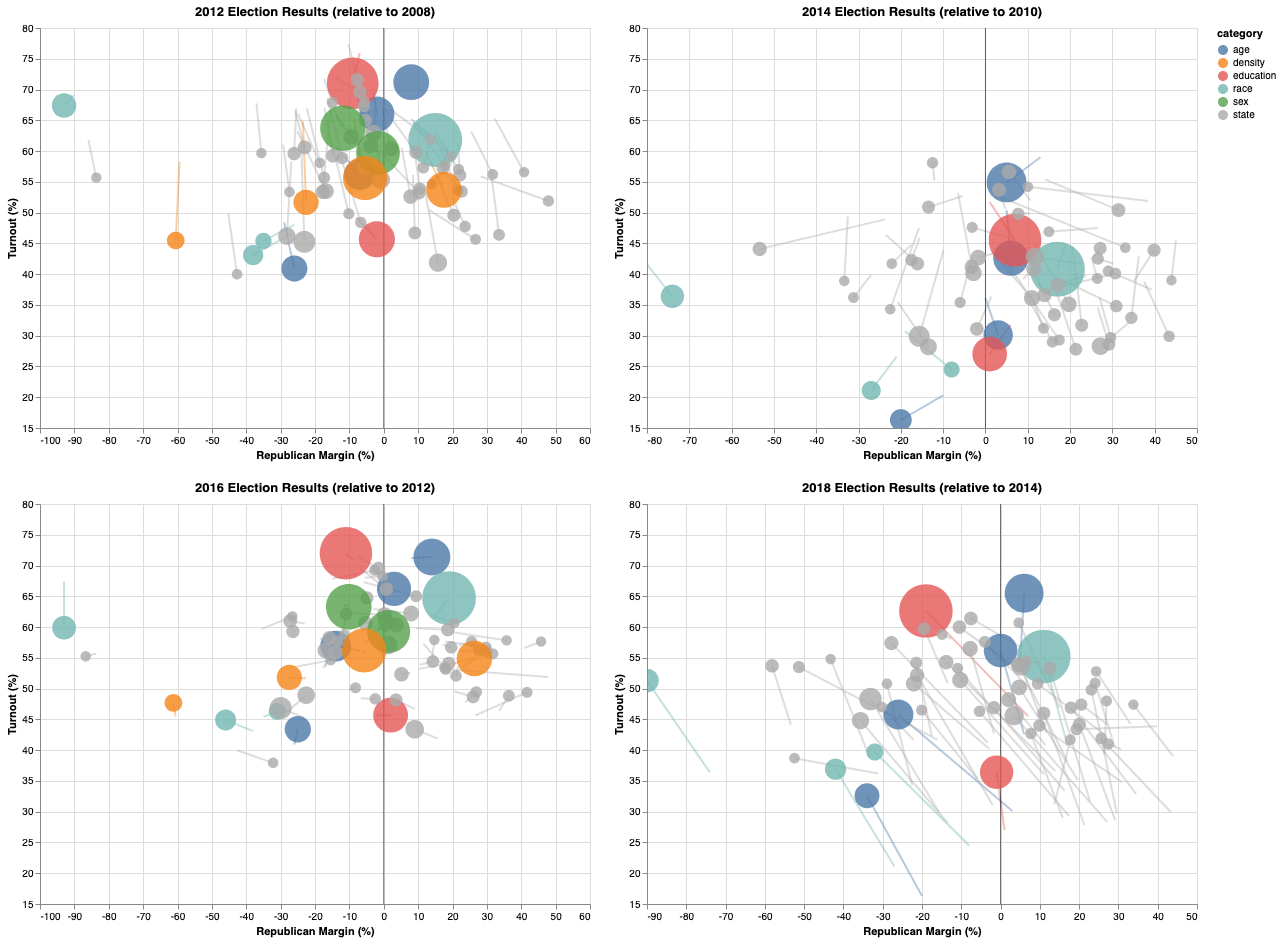

In [70]:
def year_chart(plot_df, year):
    colors = ['rgb(76, 120, 168)', 'rgb(245, 133, 24)', 'rgb(228, 87, 86)',
        'rgb(114, 183, 178)', 'rgb(84, 162, 75)','#aaa']  #rgb(186, 176, 172) #666
    scheme = 'tableau20' #tableau20 'dark2'  scheme = 'category20' category10
    
    # Using rep_margin, makes more sense because rightward shift = move to the right politically
    lines = alt.Chart(plot_df[plot_df.year.isin([year,year-4])]).mark_line().encode(
        x=alt.X('rep_margin'),
        y=alt.Y('turnout', scale=alt.Scale(zero=False)),
        detail='group',
        #color='category',
        color=alt.Color('category', scale=alt.Scale(range=colors), legend=None),
        #color=alt.Color('category', scale=alt.Scale(scheme=scheme)),  
        opacity=alt.value(0.4),
        #strokeWidth = alt.StrokeWidth(field='width', type="quantitative")
#         strokeWidth=alt.StrokeWidth('pct_elect:Q',
#             legend=None,
#             scale=alt.Scale(
#                 #domain=[0,100000000],
#                 range=[3, 20]
#             )
#         )
    ) 
    
    #https://github.com/altair-viz/altair/issues/1124
    zero_axis = pd.DataFrame({'x': [0],'y': [0]}) #
    x = alt.Chart(zero_axis).mark_rule().encode(x=alt.X('x:Q'), opacity=alt.value(0.6))
    y = alt.Chart(zero_axis).mark_rule().encode(y='y:Q', opacity=alt.value(0.6))

    circles = alt.Chart(plot_df[plot_df.year == year]).mark_point().encode(
        x=alt.X('rep_margin', title='Republican Margin (%)'),  #scale=alt.Scale(domain=[-95, 95])
        y=alt.Y('turnout', scale=alt.Scale(zero=False, domain=[15, 80]),  title='Turnout (%)'),  #scale=alt.Scale(zero=False, domain=[0, 100]),
        size= alt.Size('pct_elect:Q', scale=alt.Scale(range=[100,3000]), legend=None),  #scale=alt.Scale(range=[50,3000]), [50,2000] [25,3000] , legend=None  scale=alt.Scale(range=[50,3000]),
        tooltip=[alt.Tooltip('group:N'), alt.Tooltip('rep_margin:Q'),
            alt.Tooltip('turnout:Q'), alt.Tooltip('pct_elect:Q', format=',.0f')],  # format='.1%' .0f
        opacity=alt.value(0.8), #0.75
        #fill=alt.Color('dem_margin', scale=alt.Scale(domain=[-0.5,0.5], range=['red','purple','blue']))
        fill=alt.Color('category', scale=alt.Scale(range=colors)),
        #fill=alt.Color('category', scale=alt.Scale(scheme=scheme)),
        #fill=alt.Color('category'),
        order=alt.Order("num:Q", sort="descending")   
    )
    
    chart = alt.layer(lines, x, y, circles).properties(
        title='{0} Election Results (relative to {1})'.format(year, year-4),
        width=550,  #700  600
        height=400, #500  450
    ).interactive()
    
    return chart

charts = []

for year in [2012, 2014, 2016, 2018]:
    charts.append(year_chart(final_df, year))
    
#alt.vconcat(*charts, background='#fff')
out = alt.vconcat(alt.hconcat(charts[0], charts[1]), 
    alt.hconcat(charts[2], charts[3]), background='#fff')

out

In [73]:
# Save
# https://github.com/altair-viz/altair/issues/673
# out.save('onevis-catalist.html', embed_options={'actions': False})